In [91]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import statistics
import math

In [92]:
scenarioname = "NL-iteration1"
#shortages per year
LOLE = 4
years = list(range(2050,2090))
LOLE_hours = LOLE * len(years)
LOLE_hours

160

In [93]:
prices = pd.DataFrame()
residual_load = pd.DataFrame()
load = pd.DataFrame()

In [94]:
# for year in years:    
#     RL = pd.read_excel(path_to_results, sheet_name='residual_load', index_col=0)
#     load.at[:, year] = RL["residual_load"]     

path_to_plots =  os.path.join(os.getcwd(), "Scenarios", scenarioname)

In [95]:
# data preparation
for year in years:    
    path_to_results = os.path.join(os.getcwd(), "Scenarios", scenarioname,  (str(year) + ".xlsx"))
    data = pd.read_excel(path_to_results, sheet_name='energy_exchange', index_col=0)
    prices.at[:, year] = data["ElectricityPriceInEURperMWH"]
    
    L = pd.read_excel(path_to_results, sheet_name='energy_exchange', index_col=0)
    load.at[:, year] = L["TotalAwardedPowerInMW"]     

In [96]:
for year in years:    
    path_to_results = os.path.join(os.getcwd(), "Scenarios", scenarioname,  (str(year) + ".xlsx"))
    data = pd.read_excel(path_to_results, sheet_name='energy_exchange', index_col=0)
    prices.at[:, year] = data["ElectricityPriceInEURperMWH"]

In [97]:
yearly_electricity_prices = pd.concat([prices[2050]] + [prices[column] for column in prices.columns[1:]], axis=0, ignore_index=True)
yearly_load = pd.concat([load[2050]] + [load[column] for column in load.columns[1:]],   axis=0, ignore_index=True)

In [98]:
prices_load = pd.concat([yearly_electricity_prices, yearly_load], axis=1)

In [99]:
prices_load.columns = ['price', 'load']
prices_load["revenues"] =  prices_load["price"]*prices_load['load']
prices_load.sort_values(by="price", ascending=False, inplace=True)
prices_load.reset_index(inplace=True)

In [100]:
prices_load.head()

,index,price,load,revenues
0,307051,4000.0,19314.992591,7.725997e+07
1,333786,4000.0,19688.339562,7.875336e+07
2,262864,4000.0,21888.379899,8.755352e+07
3,68753,4000.0,20310.509641,8.124204e+07
4,643,4000.0,21257.473960,8.502990e+07


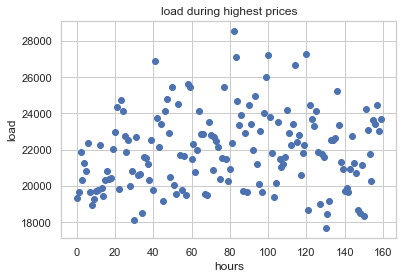

In [101]:
axs = plt.scatter(prices_load.index[0:LOLE_hours], prices_load["load"][0:LOLE_hours])  
plt.title("load during highest prices")
plt.ylabel("load")
plt.xlabel("hours")
fig1 = axs.get_figure()
fig1.savefig(path_to_plots + '/' + 'served Load during highest prices .png', bbox_inches='tight', dpi=300)
# shortages dont occur when highest load

In [102]:
shortagesrows =  prices_load[prices_load["price"]== 4000]# EUR
hours_with_shortages = shortagesrows.shape[0]
print("hours_with_shortages", hours_with_shortages)
excess_shortage_hours = hours_with_shortages - LOLE_hours
print("excess_shortage_hours", excess_shortage_hours)
excess_shortage_hours/40

hours_with_shortages 271
excess_shortage_hours 111


2.775

In [106]:
revenues_acceptable_LOLE =  sum(prices_load["revenues"][0:LOLE_hours]) # EUR
print(revenues_acceptable_LOLE)
revenues_in_shortages =  sum(shortagesrows["revenues"]) # EUR
print(revenues_in_shortages)
revenues_SR = revenues_in_shortages - revenues_acceptable_LOLE 
print(revenues_SR/1000000)
revenues_SR 

14051513169.65291
23395672783.041256
9344.159613388345


9344159613.388346

In [107]:
excess_shortage_energy =prices_load[LOLE_hours:hours_with_shortages]["load"].sum()
excess_shortage_energy

2336039.9033470894

In [108]:
elec_prices = yearly_electricity_prices.sort_values( ascending=False)
Elec_prices = pd.DataFrame({'elec_prices': elec_prices})
Elec_prices.reset_index(inplace=True)

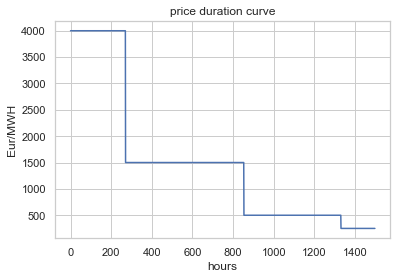

In [109]:
axs = Elec_prices["elec_prices"][0:1500].plot() 
plt.title("price duration curve")
plt.ylabel("Eur/MWH")
plt.xlabel("hours")
fig1 = axs.get_figure()
fig1.savefig(path_to_plots + '/' + 'price duration curve.png', bbox_inches='tight', dpi=300)

In [110]:
hours_shortages = (Elec_prices["elec_prices"] == 4000).sum()
extra_hours_shortages = hours_shortages - LOLE_hours
extra_hours_shortages/40


2.775

Text(0.5, 0, 'hours')

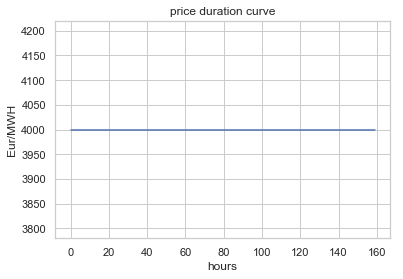

In [111]:
Elec_prices["elec_prices"][0:LOLE_hours].plot() 
plt.title("price duration curve")
plt.ylabel("Eur/MWH")
plt.xlabel("hours")

In [112]:
YL = yearly_load.sort_values( ascending=False)
yearlyload = pd.DataFrame({'yl': YL})
yearlyload.reset_index(inplace=True)

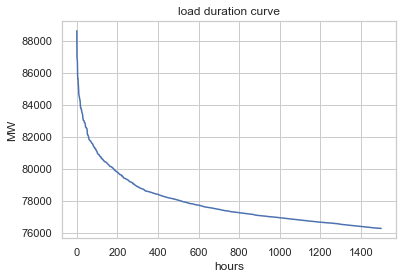

In [113]:
axs = yearlyload["yl"][0:1500].plot()
plt.title("load duration curve")
plt.ylabel("MW")
plt.xlabel("hours")
fig1 = axs.get_figure()
fig1.savefig(path_to_plots + '/' + 'load duration curve.png', bbox_inches='tight', dpi=300)

peak 88635
peak_served 80203
peak_with_shortages 79136
acceptable_shortageMW 8432
extra_capacity_SR 1066


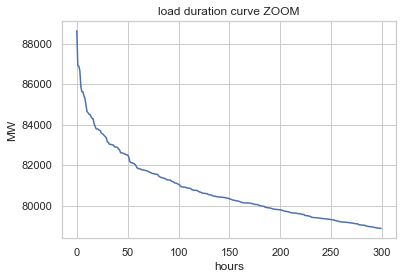

In [119]:
yearlyload["yl"][0:300].plot()
plt.title("load duration curve ZOOM")
plt.ylabel("MW")
plt.xlabel("hours")
# acceptable_shortage = load that can be shedded
peak = yearlyload["yl"].iloc[0]
print("peak" , int(peak))

peak_served = yearlyload["yl"].iloc[LOLE_hours]
print("peak_served" , int(peak_served))

peak_with_shortages = yearlyload["yl"].iloc[hours_with_shortages]
print("peak_with_shortages" , int(peak_with_shortages))

acceptable_shortageMW = (peak - peak_served)
print("acceptable_shortageMW" , int(acceptable_shortageMW))

extra_capacity_SR = (peak_served - peak_with_shortages)
print("extra_capacity_SR" , int(extra_capacity_SR))


In [115]:
# average_volume =( peak_served + peak_with_shortages )/2 
# theoreticalSR_revenues = excess_shortage_hours*2000*average_volume # h *eur/MWh*V = Eur
# theoreticalSR_revenues/1000000000

17.686769557203004

In [120]:
# volume where reserve should be active = volume when there are shortages 
reserve_margin = extra_capacity_SR/peak_served  
reserve_margin_per = reserve_margin*100
print("reserve_margin_per" , float(reserve_margin_per))

reserve_margin_per 1.3295479373412502


In [126]:
extra_capacity_SR

1066.3413717035146

In [121]:
sr_price = 2000
EnergySR = revenues_SR/sr_price
activation_hours =  EnergySR/extra_capacity_SR #MWH/MW
activation_hours

4381.410991519888

In [122]:

volumeSR = (revenues_SR/sr_price)/activation_hours
print("volumeSR", volumeSR)
reserve_margin_per = volumeSR/peak_served*100
print("reserve_margin_%", reserve_margin_per)

volumeSR 42090.80906931688
reserve_margin_% 52.480143661437374


In [104]:
peak_served

80203.30382640583

In [ ]:
volumeSR = (revenues_SR/sr_price)/activation_hours
print("volumeSR", volumeSR)
reserve_margin_per = volumeSR/peak_served*100